## Linear Regression and RANSAC

In [1]:
# Load the modules we need
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

In [2]:
#  Create some intial data
n_samples = 1000

X, y = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      random_state=0)

In [3]:
# Add some outlier data
np.random.seed(0)
n_outliers = 50
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [4]:
# Create some test positions for for the lines we will draw
line_X = np.arange(X.min(), X.max())[:, np.newaxis]

In [5]:
# This is the cell you need to replace to complete Task 2.
# Fit line using all data.
from LinearRegression import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
line_y = lr.predict(line_X)
print(line_y)

lr1 = linear_model.LinearRegression()
lr1.fit(X, y)
line1_y = lr1.predict(line_X)
print(line1_y)

[-174.38323639 -120.21087252  -66.03850865  -11.86614478   42.30621909
   96.47858295  150.65094682  204.82331069]
[-174.38323639 -120.21087252  -66.03850865  -11.86614478   42.30621909
   96.47858295  150.65094682  204.82331069]


In [6]:
# This is the cell you need to replace to complete Task 3.
# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)

# Predict data of estimated models
line_y_ransac = ransac.predict(line_X)
print(line_y_ransac)

# Label the if source data is inlier or outlier
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

[-249.81104528 -167.72571369  -85.64038211   -3.55505052   78.53028107
  160.61561265  242.70094424  324.78627583]


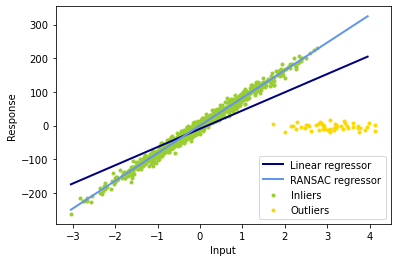

In [7]:
lw = 2

doing_linear = True
doing_ransac = True

if (doing_linear):
    plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')

if (doing_ransac):
    plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
    plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
    plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')
else:
    plt.scatter(X, y, color='yellowgreen', marker='.', label='Data')
    
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()